正则化
===

# 1.引子

## 1.1.正则化出现的背景
我们在最小二乘法中介绍了最少二乘法的原理，知道了最小二乘法使用的前提是必须满足数据集没有多重共线性，因为它是无偏估计(根据原始数据进行的估计，没有任何人的主观因素的估计)，所以它非常惧怕多重共线性问题，在面对这些数据时，它往往得到的权重参数方差大，所以是一个不稳定的回归算法。工程应用中，你拿到的数据集可能有上百个特征维度，实际上是很难保证数据集中的所有维度都满足无共线性，所以最小二乘法实际上没有太多的实际应用价值，它必须要想到一种办法解决多重共线性，进而过滤掉那些权重参数等于或接近于0的特征项，因为它们根本就对最终的标签值贡献不了任何东西，于是正则化项就出现了

![images](Images/01_001.png)

从左往右看，模型的复杂度逐渐提高，在训练集上的预测错误逐渐减少，但它在测试集上的错误率却呈现一条下凸曲线

![images](Images/01_002.png)

这是因为训练集上肯定是错误率越来越低，但是在测试集上，有一个临界点，越过了临界点，就发生了过拟合，错误率反而升高了。

## 1.2.正则化的由来

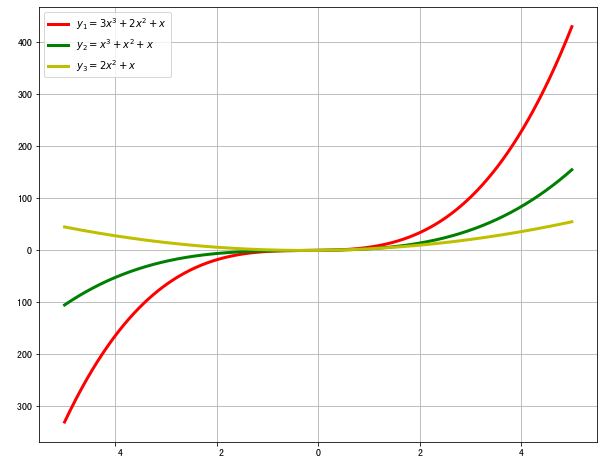

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, num=1000)
y1 = 3 * x**3 + 2 * x**2 + x
y2 = x**3 + x**2 + x
y3 = 2 * x**2 + x

plt.figure(figsize=(10,8), facecolor='w')
plt.plot(x, y1, color='r', linewidth=3, label="$y_1=3x^3+2x^2+x$")
plt.plot(x, y2, color='g', linewidth=3, label="$y_2=x^3+x^2+x$")
plt.plot(x, y3, color='y', linewidth=3, label="$y_3=2x^2+x$")
plt.grid(True)
plt.legend()

在上图中我们绘制了三条不同的曲线$y_1$、$y_2$、$y_3​$，从曲线函数值的变化不难看出，$y_1​$的函数值变化最大，$y_2$​和$y_3​$的函数值变化相对来说要平缓一些。通过函数的表达式可以看出，$y_2$​相对于$y_1​$来说自变量的系数值变小了，$y_3$​相对$y_1$来说自变量少了一个，我们可以理解为少的那个自变量的系数为0。通常如果函数的取值变化的幅度更大，我们会认为函数更复杂，函数的方差更大。所以，上面的三个函数中，函数y1​的复杂度最高。通过函数图像可以发现，降低自变量的系数值，或者减少函数自变量的个数(自变量的系数为0)是可以降低函数复杂度的。

在构建模型之前，我们是不知道数据的分布，如果模型过于简单就会导致欠拟合，如果模型过于复杂就会过拟合。通常我们为了模型能够更好的拟合数据都是使得模型处于过拟合，为了降低模型的过拟合就需要使得模型部分权重为0或者降低模型的权重，所以我们会为损失函数添加一个惩罚项，数学表达式如下
$$\widetilde{J}(\theta;X,y)=J(\theta;X,y)+\alpha\Omega(\theta), \alpha \in [0, +\infty)$$

# 2.正则化项
常用的正则化向一般有两种，L1正则化和L2正则化，他们都可以看作是成本函数的惩罚项。(通常会在正则项前面添加一个系数$\alpha$，称为超参数)

## 2.1.L1正则化
L1正则化是指权重参数$\omega$中各个元素的绝对值之和，通常表示为$||\omega||_1$。L1正则化可以产生稀疏权重参数矩阵，从而得到一个稀疏模型，这样表示为0的特征的贡献值为0，那么自然地我们会在这100个特征列中将这些过滤掉，只留下那些对因变量产生主要贡献的参数，简而言之，这样我们可以用L1正则化进行特征选择；同时一定程度上，L1可以防止过拟合。

## 2.2.L2正则化
L2正则化是指权重参数$\omega$中各个元素的平方和，然后再求平方根，通常表示为$||\omega||_2$。L2正则化可以防止模型过拟合。

# 3.神经网络与正则化
在神经网络中，带有箭头的线实际上都带有权重，而神经元是储存输入输出的地方，防止网络在优化方向上过于放飞自我，这里我们还需要加入一个先验——正则化惩罚项，用来惩罚神经元的加权矩阵。我们设的正则化系数很大，导致一些加权矩阵的值几乎为零——那最后我们得到的是一个更简单的线性网络，它很可能是欠拟合的。因此这个系数并不是越大越好。我们需要优化这个正则化系数的值，以便获得一个良好拟合的模型